## Unit 2 - Time-Independent Schrödinger Equation

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/QM_Problem_210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 2.10

Consider TISE for harmonic oscillator potential.

(a) Construct $\psi_2(x)$.

(b) Sketch $\psi_0(x)$, $\psi_1(x)$, and $\psi_2(x)$.

(c) Check the orthogonality of $\psi_0(x)$, $\psi_1(x)$, and $\psi_2(x)$, by explicit integration. 

### Solution

#### Load SymPy and variables

In [1]:
import sympy as sym

In [2]:
m, h, w, A, a = sym.symbols("m, hbar, w, A, a", positive = True, real = True)
x = sym.symbols("x", real = True)

In [3]:
sym.init_printing(use_unicode=True)

#### Solution to (a)

Stationary solutions:
$$
\psi_n(x) = \frac{1}{\sqrt{n!}} (\hat a_+)^n \psi_0(x) \qquad \psi_0(x) = \bigg( \frac{m\omega}{\pi \hbar}\bigg)^{1/4} \exp\bigg( -\frac{m\omega}{2\hbar } x^2 \bigg)
$$
Ladder operators:
$$
\hat a_\pm 
= \frac{1}{\sqrt{2\hbar m \omega}} (\mp i \hat p + m \omega x) 
= \frac{1}{\sqrt{2\hbar m \omega}} (\mp \hbar \partial_x + m \omega x) 
$$
Short-hand notation:
$$
A = \bigg( \frac{m\omega}{\pi \hbar}\bigg)^{1/4} \qquad a = \frac{1}{\sqrt{2\hbar m \omega}}
$$

In [4]:
# the ground state

𝜓0 = A * sym.exp( -(m*w)/(2*h)*(x**2) ) 

In [5]:
# ladder-up operator

def a_plus(𝜓):
    return sym.simplify( a*(-h*sym.diff(𝜓,x,1) + m*w*x*𝜓) )

In [6]:
# the first excited state

𝜓1 = a_plus(𝜓0)
𝜓1

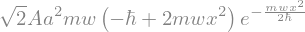

In [7]:
# the second excited state

𝜓2 = 1/sym.sqrt(2) * a_plus(𝜓1)
𝜓2

#### Solution to (b)

In [8]:
# choose numeric values for all parameters 

nm, nh, nw = 1, 1, 1
nA = ((nm*nw)/(sym.pi*nh))**(1/4)
na = (2*nh*nm*nw)**(-1/2)

n𝜓0 = 𝜓0.subs({m:nm, h:nh, w:nw, A:nA, a:na})  # substitute values
n𝜓1 = 𝜓1.subs({m:nm, h:nh, w:nw, A:nA, a:na}) 
n𝜓2 = 𝜓2.subs({m:nm, h:nh, w:nw, A:nA, a:na}) 

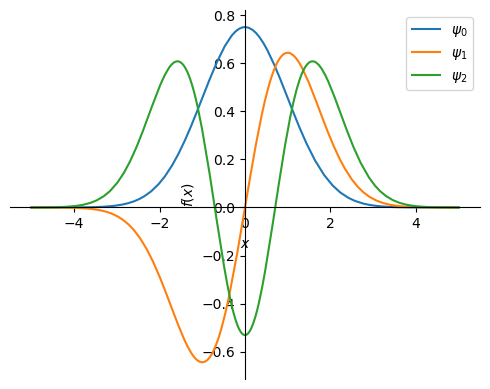

In [9]:
# plot the first three states

p1 = sym.plotting.plot( n𝜓0, (x,-5,5), show=False, label="$\psi_0$", legend = True, size=(5,4))
p2 = sym.plotting.plot( n𝜓1, (x,-5,5), show=False, label="$\psi_1$", legend = True)
p3 = sym.plotting.plot( n𝜓2, (x,-5,5), show=False, label="$\psi_2$", legend = True)
p1.extend(p2)
p1.extend(p3)
p1.show()

#### Solution to (c)

We need to verify that
$$
\int_{-\infty}^{+\infty} \psi_m(x)\,\psi_n(x)\,dx = \delta_{mn}
$$
for $n,m=0,1,2$.

In [10]:
# braket <𝜓n|𝜓m> 
A_value = ((m*w)/(sym.pi*h))**(sym.Rational(1,4))
a_value = (2*h*m*w)**(-sym.Rational(1,2))
def braket(𝜓n, 𝜓m):
    return sym.integrate(𝜓n.conjugate()*𝜓m, (x, -sym.oo, sym.oo)).subs({A:A_value, a:a_value})

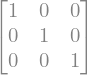

In [11]:
# list of states
states = [𝜓0,𝜓1,𝜓2]

results = sym.zeros(3,3)
for i in range(3):
    for j in range(3):
        results[i,j] = braket(states[i],states[j])

# show results 
results    

### Extra

We will define the number operator $\hat N = \hat a_+ \hat a_-$ and verify that $\hat N \psi_n = n \psi_n$ for a chosen value of $n$.

In [12]:
# ladder-down operator

def a_minus(𝜓):
    return sym.simplify( a*(h*sym.diff(𝜓,x,1) + m*w*x*𝜓) )

# number operator

def N(𝜓):
    return sym.simplify( a_plus(a_minus(𝜓)) )

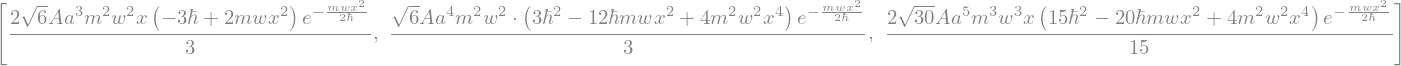

In [13]:
# excited states

𝜓3 = 1/sym.sqrt(3) * a_plus(𝜓2)
𝜓4 = 1/sym.sqrt(4) * a_plus(𝜓3)
𝜓5 = 1/sym.sqrt(5) * a_plus(𝜓4)
[𝜓3,𝜓4,𝜓5]

The relation $\hat N \psi_n = n \psi_n$ is equivalent to $\langle \psi_n | \hat N | \psi_n \rangle = n$. <br>
When $n=5$, we must get $\langle \psi_5 | \hat N | \psi_5 \rangle = 5$.

In [14]:
braket(𝜓5,N(𝜓5))

---